Once deleted, variables cannot be recovered. Proceed (y/[n])? y


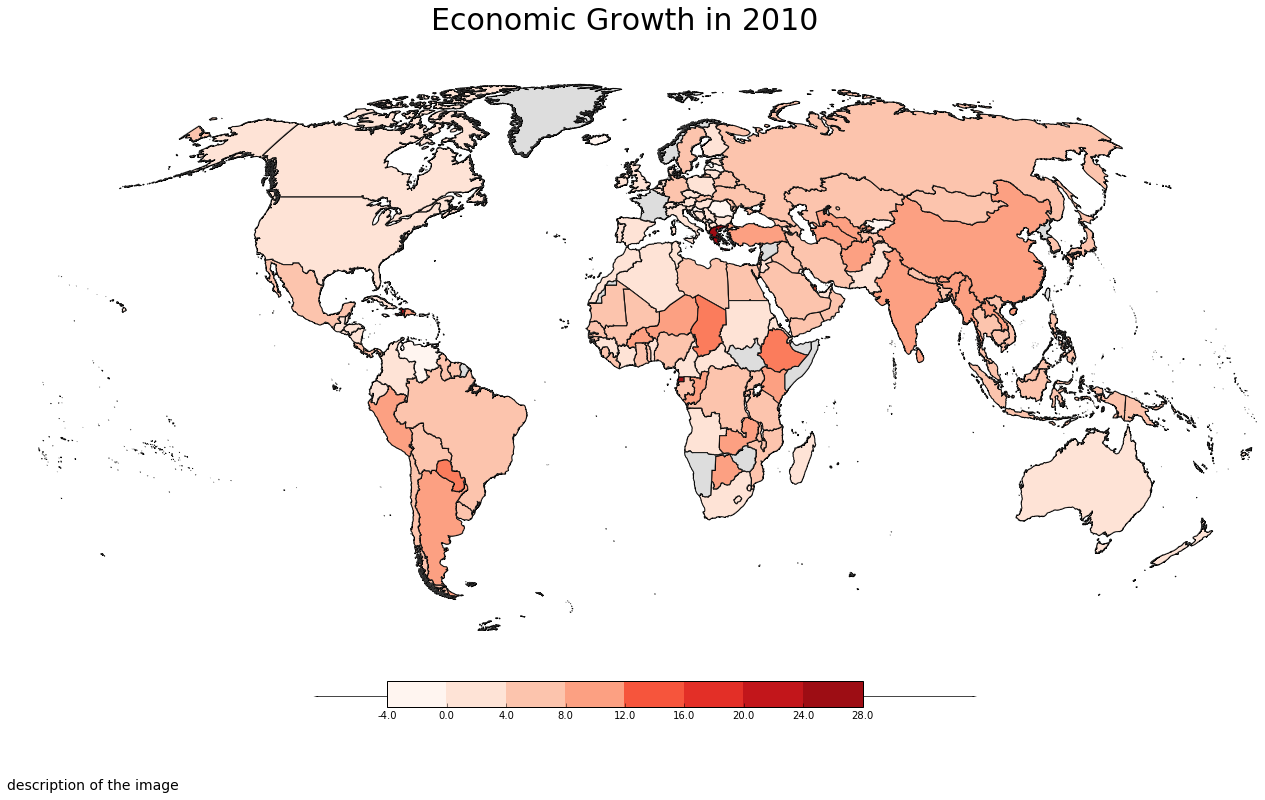

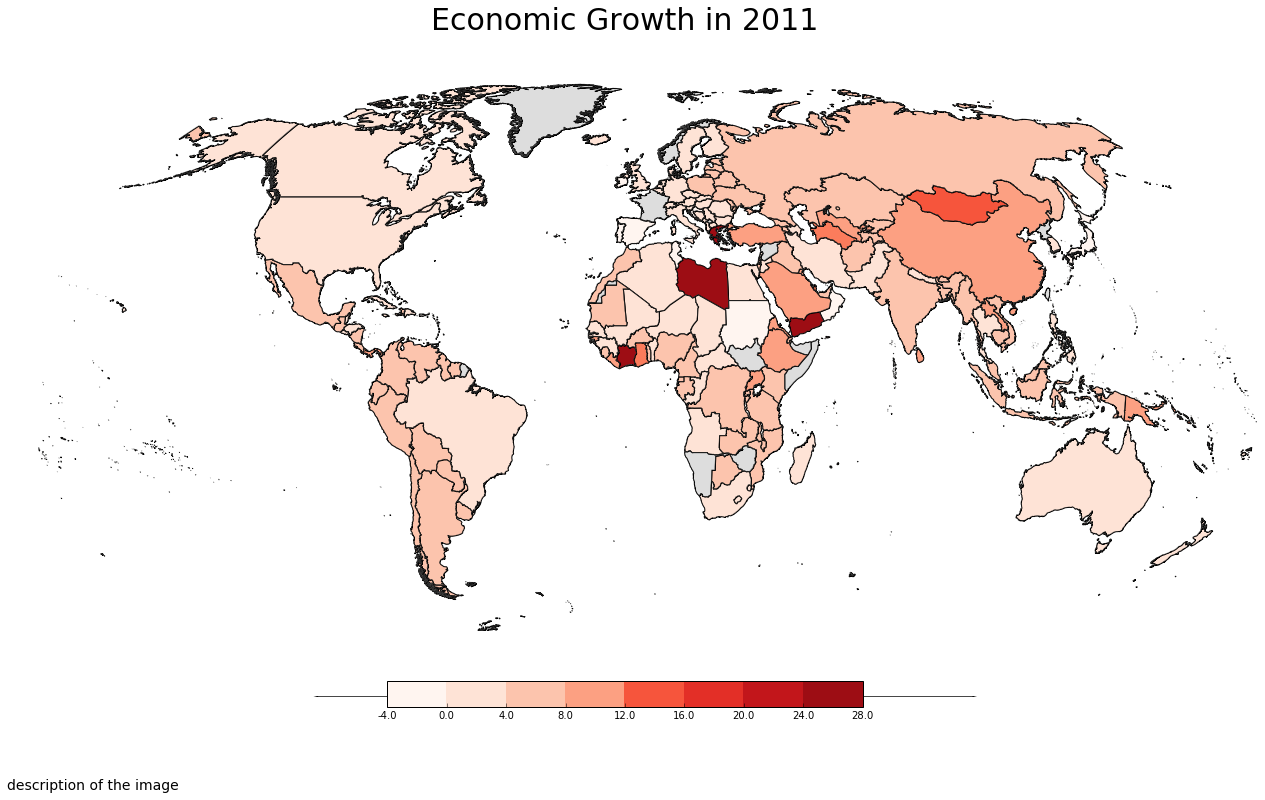

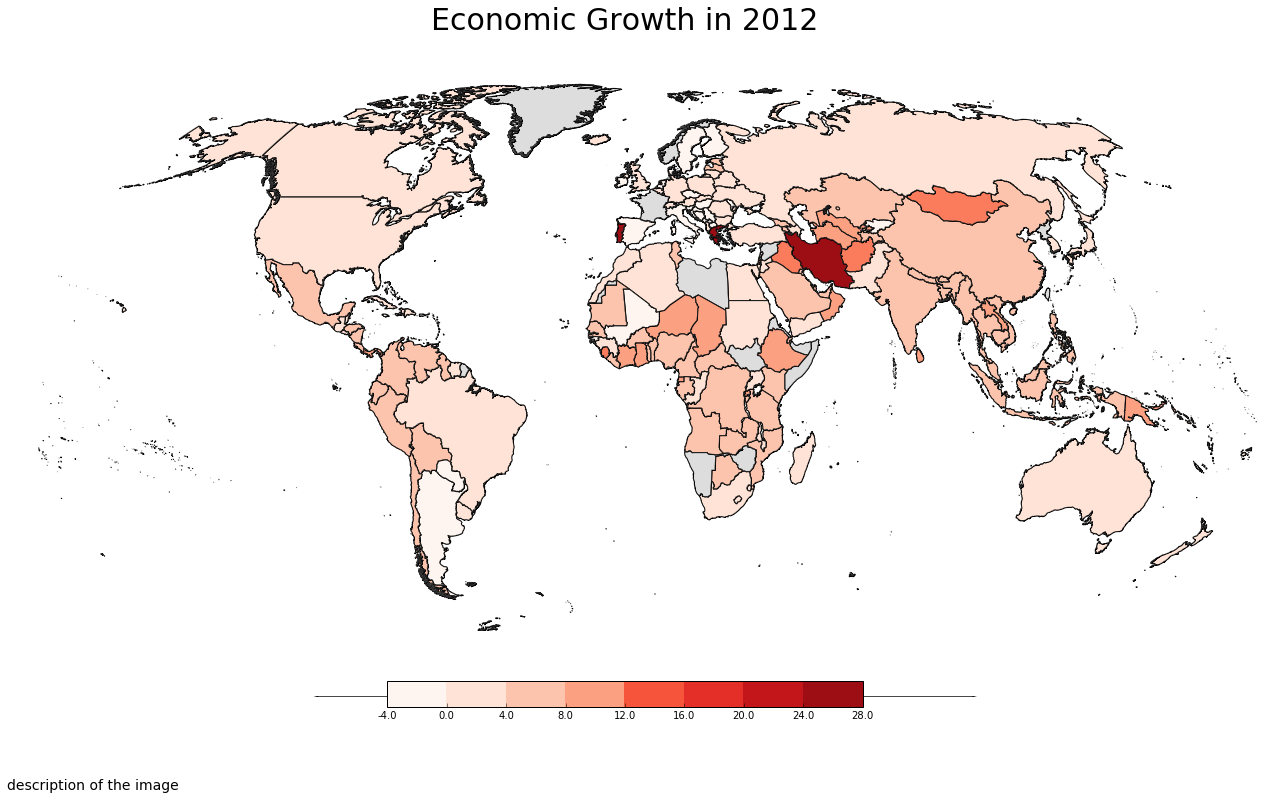

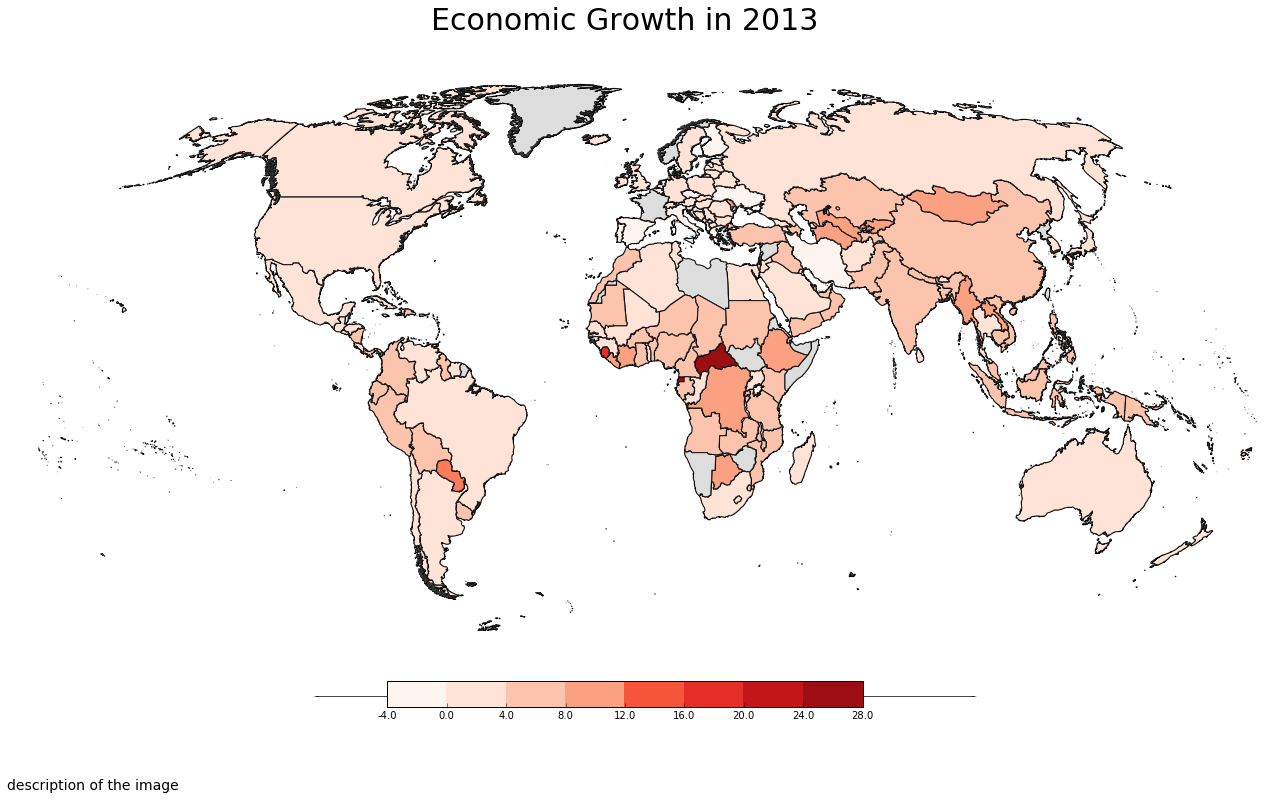

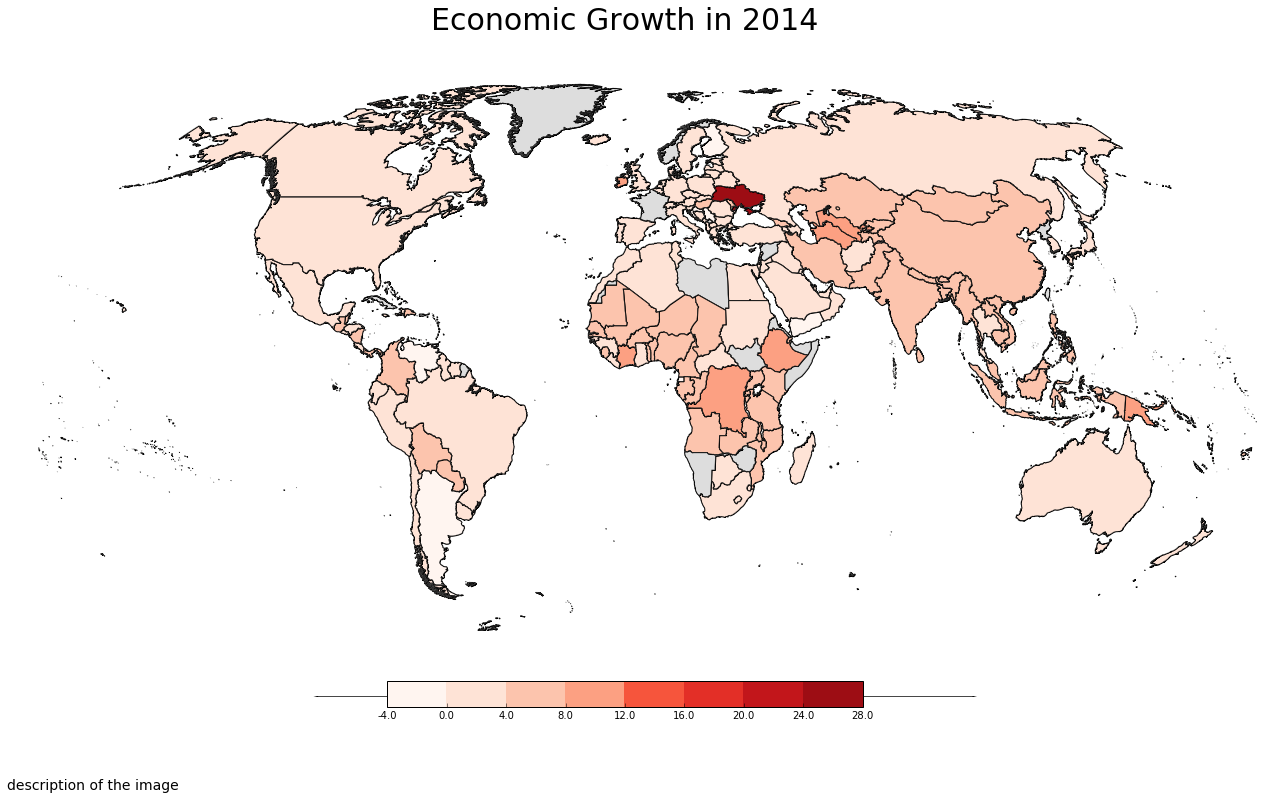

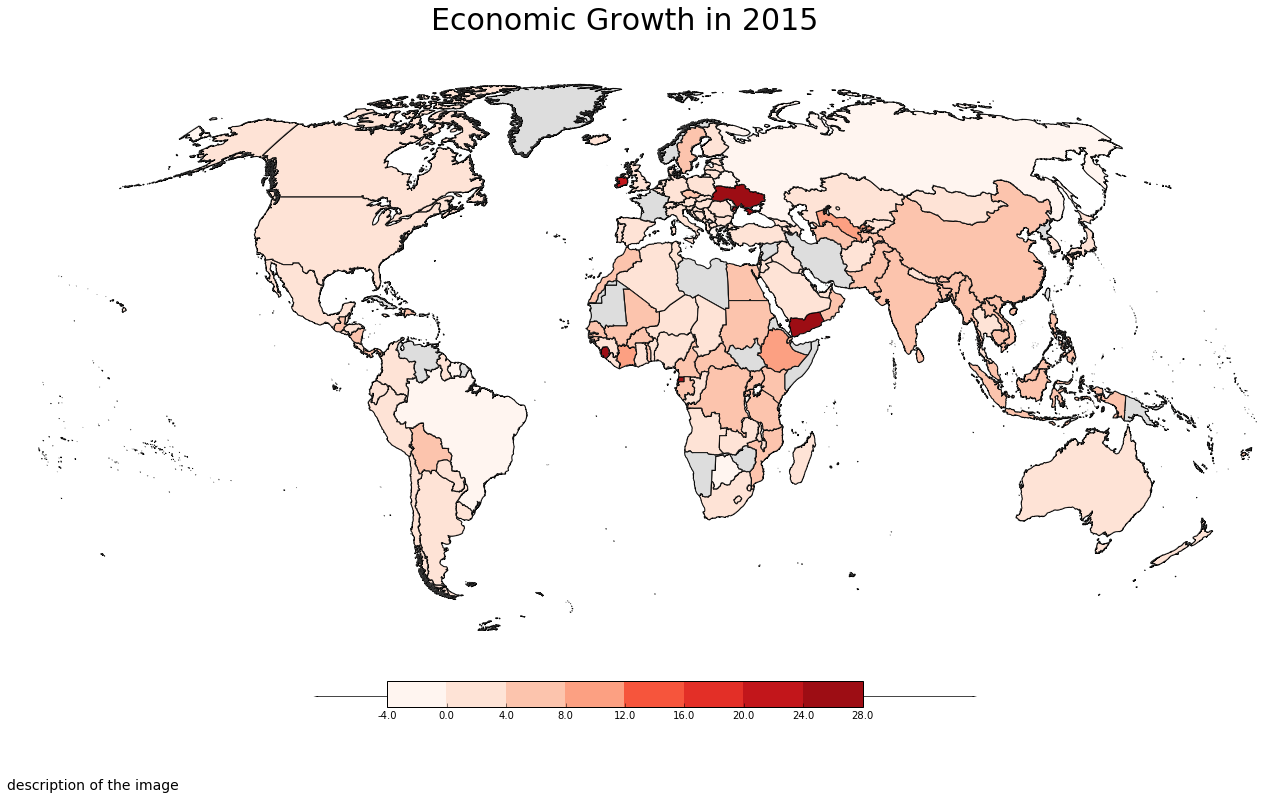

In [1]:
######## adapted from http://ramiro.org/notebook/basemap-choropleth/
%reset
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

# map from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
workfolder = 'C:/cygwin/home/qqian/xuep/countrymap/'
os.chdir(workfolder)

filename = workfolder + '/global_GDP.csv'
shapefile = 'C:/cygwin/home/qqian/xuep/countrymap/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes'
num_colors = 9

gc = GeonamesCache()
iso_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso').keys())
df = pd.read_csv(filename, index_col=None)

for year in range(2010,2016):
    title = 'Economic Growth in {}'.format(year)
    #imgfile = 'img/{}.png'.format(slug(title))
    imgfile = './img/{}.png'.format(year)
    descripton = 'description of the image'
    df_year = df[df['year'] == year]
    df_year = df_year[df_year['Economic growth'].notnull()].set_index('code')

    ## produce the color scheme, bins
    values = df_year['Economic growth']
    ranges = np.arange(-4,29)
    cm = plt.get_cmap('Reds')
    scheme = [cm(float(i)/num_colors) for i in range(0,num_colors)]

    bins = np.linspace(ranges.min(), ranges.max(), num_colors)
    df_year['bin'] = np.digitize(values, bins) - 1
    df_year.sort_values('bin', ascending=False).head(10)

    ## make the plot
    #mpl.style.use('map')
    fig = plt.figure(figsize=(22, 12))

    ax = fig.add_subplot(111, axisbg='w', frame_on=False)
    fig.suptitle('Economic Growth in {}'.format(year), fontsize=30, y=.95)

    m = Basemap(lon_0=0, projection='robin')
    m.drawmapboundary(color='w')

    m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)

    for info, shape in zip(m.units_info, m.units):
        iso = info['ISO_A2']
        if iso not in df_year.index:
            color = '#dddddd'
        else:
            color = scheme[df_year.ix[iso]['bin']]

        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)

    # Cover up Antarctica so legend can be placed over it.
    ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

    # Draw color legend.
    ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
    cmap = mpl.colors.ListedColormap(scheme)
    cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
    cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

    # Set the map footer.
    plt.annotate(descripton, xy=(-.8, -3.2), size=14, xycoords='axes fraction')
    plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)




In [2]:
%reset
# install ImageMagick https://www.imagemagick.org/script/download.php
# Append path in cygwin .bash_profile  ---    export PATH="/cygdrive/c/Program Files/ImageMagick-7.0.4-Q16/":$PATH
import os
workfolder = 'C:/cygwin/home/qqian/xuep/countrymap/img/'
os.chdir(workfolder)
os.system("pwd")
os.system("magick convert -delay 100 *.png econgrow1.gif")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


0